In [1]:
# Start writing code here...
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

train = datasets.FashionMNIST('FashionMnist',download = True, train = True,transform = transform)
trainloader = DataLoader(train, batch_size = 64, shuffle = True)

test = datasets.FashionMNIST('FashionMnist',download = True, train = False, transform = transform)
testloader = DataLoader(test,batch_size = 64, shuffle = True)


model = nn.Sequential(
    nn.Linear(784,300),
    nn.ReLU(),
    nn.Linear(300,200),
    nn.ReLU(),
    nn.Linear(200,10),
    nn.Softmax(dim=1))

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr = 0.03)










![Picture title](image-20210227-215135.png)

In [73]:
def view_classify(img,ps):
    print(ps.shape)
    ps = ps.data.numpy().squeeze()
    fig, (ax1,ax2) = plt.subplots(1,2,figsize = (6,9))
    ax1.imshow(img.resize_(1,28,28).numpy().squeeze())
    ax2.barh(np.arange(10),ps)
    
    ax1.axis('off')
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels( np.arange(10))  
    ax2.set_title('Class Probability')  
    ax2.set_xlim(0,1.1)

In [6]:
epochs = 20

for e in range(epochs):
    running_loss = 0
    min_loss = np.inf
    val_loss_improve = 0
    total = 0
    correct = 0
    print_every = 100
    print('epoch:',e+1)

    for i,(images,labels) in enumerate(iter(trainloader)):
        val_loss = 0
        running_loss = 0
        images.resize_(images.size()[0],784)
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % print_every == 0:
            print(f"\tIteration: {i}\t Loss: {running_loss/print_every:.4f}")
            running_loss = 0


    model.eval()
    with torch.no_grad():
        for i,(images,labels) in enumerate(iter(testloader)):
            images.resize_(images.size()[0],784)
            outputs = model(images)
            loss = criterion(outputs,labels)
            val_loss += loss.item()
            _,predicted = torch.max(outputs.data,1)
            total += labels.size()[0]
            correct += (predicted == labels).sum().item()
    print('Accuracy:',correct*100/total)

epoch: 1
	Iteration: 0	 Loss: 0.0163
	Iteration: 100	 Loss: 0.0168
	Iteration: 200	 Loss: 0.0164
	Iteration: 300	 Loss: 0.0166
	Iteration: 400	 Loss: 0.0162
	Iteration: 500	 Loss: 0.0162
	Iteration: 600	 Loss: 0.0166
	Iteration: 700	 Loss: 0.0167
	Iteration: 800	 Loss: 0.0166
	Iteration: 900	 Loss: 0.0165
Accuracy: 79.63
epoch: 2
	Iteration: 0	 Loss: 0.0163
	Iteration: 100	 Loss: 0.0174
	Iteration: 200	 Loss: 0.0166
	Iteration: 300	 Loss: 0.0166
	Iteration: 400	 Loss: 0.0166
	Iteration: 500	 Loss: 0.0164
	Iteration: 600	 Loss: 0.0166
	Iteration: 700	 Loss: 0.0161
	Iteration: 800	 Loss: 0.0169
	Iteration: 900	 Loss: 0.0168
Accuracy: 80.29
epoch: 3
	Iteration: 0	 Loss: 0.0162
	Iteration: 100	 Loss: 0.0170
	Iteration: 200	 Loss: 0.0165
	Iteration: 300	 Loss: 0.0166
	Iteration: 400	 Loss: 0.0170
	Iteration: 500	 Loss: 0.0174
	Iteration: 600	 Loss: 0.0171
	Iteration: 700	 Loss: 0.0167
	Iteration: 800	 Loss: 0.0170
	Iteration: 900	 Loss: 0.0165
Accuracy: 80.17
epoch: 4
	Iteration: 0	 Loss: 0

torch.Size([1, 10])


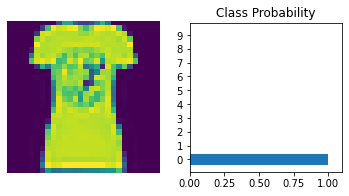

In [74]:
images, labels = next(iter(testloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=88190736-eb57-4922-a018-2ff5a44a7537' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>